In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('csv/job_postings_fact.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_posted_month'] = df.job_posted_date.dt.strftime('%b')
df.index.name = 'index_job'
df

,job_id,company_id,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,job_posted_month
index_job,,,,,,,,,,,,,,,,,
0,0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,False,False,Serbia,NaN,NaN,NaN,Sep
1,55,1,Cloud Engineer,Storage and Virtualization Engineer,"Kuwait City, Kuwait",via Trabajo.org,Full-time,False,Kuwait,2023-07-30 17:49:18,True,False,Kuwait,NaN,NaN,NaN,Jul
2,66,2,Data Analyst,Data Analyst et Scientist F/H,"Paris, France",via Emplois Trabajo.org,Full-time,False,France,2023-07-28 17:28:01,False,False,France,NaN,NaN,NaN,Jul
3,76,3,Data Engineer,Data Engineer,"Denver, CO",via LinkedIn,Contractor,False,"Illinois, United States",2023-04-03 17:14:45,False,False,United States,hour,NaN,70.0,Apr
4,81,4,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Contractor,True,Canada,2023-03-25 17:25:20,False,False,Canada,NaN,NaN,NaN,Mar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787681,1146883,787681,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,Mar
787682,1300468,31237,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,Mar
787683,837368,948,Senior Data Engineer,Senior Data Engineer (m/w/d),"Düsseldorf, Jerman",melalui Monster.de,Pekerjaan tetap,False,Germany,2023-03-13 06:18:59,False,False,Germany,NaN,NaN,NaN,Mar


In [50]:
cnd_job = df[df['job_country'] == 'Canada'].copy()
cnd_job_pivot = cnd_job.pivot_table(columns='job_title_short', index='job_posted_month', aggfunc='size')
cnd_job_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
Apr,139,31,184,516,167,54,30,173,48,123
Aug,117,26,180,370,162,56,57,126,68,115
Dec,87,42,227,423,164,34,29,116,48,128
Feb,68,24,148,499,129,34,33,169,44,105
Jan,137,25,288,958,254,56,65,256,87,122
Jul,93,25,212,503,173,42,44,152,57,79
Jun,88,10,185,489,123,45,27,167,44,63
Mar,77,27,155,542,149,67,30,159,58,104
May,62,8,160,532,99,43,24,148,34,65


In [51]:
cnd_job_pivot.reset_index(inplace=True)
cnd_job_pivot['month_number'] = pd.to_datetime(cnd_job_pivot['job_posted_month'], format='%b').dt.month
# cnd_job_pivot.sort_values('month_number')
cnd_job_pivot['month_number']

0      4
1      8
2     12
3      2
4      1
5      7
6      6
7      3
8      5
9     11
10    10
11     9
Name: month_number, dtype: int32

In [52]:
cnd_job_pivot.sort_values(by='month_number', inplace=True)
cnd_job_pivot.set_index('job_posted_month', inplace=True)
cnd_job_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_number
job_posted_month,,,,,,,,,,,
Jan,137,25,288,958,254,56,65,256,87,122,1
Feb,68,24,148,499,129,34,33,169,44,105,2
Mar,77,27,155,542,149,67,30,159,58,104,3
Apr,139,31,184,516,167,54,30,173,48,123,4
May,62,8,160,532,99,43,24,148,34,65,5
Jun,88,10,185,489,123,45,27,167,44,63,6
Jul,93,25,212,503,173,42,44,152,57,79,7
Aug,117,26,180,370,162,56,57,126,68,115,8
Sep,81,14,206,308,125,38,39,99,34,95,9


In [53]:
cnd_job_pivot.drop(columns='month_number', inplace=True)

In [54]:
cnd_job_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
Jan,137,25,288,958,254,56,65,256,87,122
Feb,68,24,148,499,129,34,33,169,44,105
Mar,77,27,155,542,149,67,30,159,58,104
Apr,139,31,184,516,167,54,30,173,48,123
May,62,8,160,532,99,43,24,148,34,65
Jun,88,10,185,489,123,45,27,167,44,63
Jul,93,25,212,503,173,42,44,152,57,79
Aug,117,26,180,370,162,56,57,126,68,115
Sep,81,14,206,308,125,38,39,99,34,95


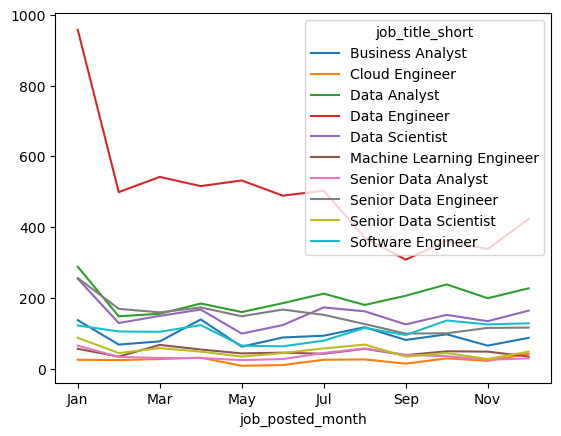

In [56]:
cnd_job_pivot.plot(kind='line')
plt.show()

### Now Let's try to narrow down the above line chart to the three (3) top job title

In [57]:
top_job = cnd_job['job_title_short'].value_counts().head(3)
top_job = top_job.index.to_list()

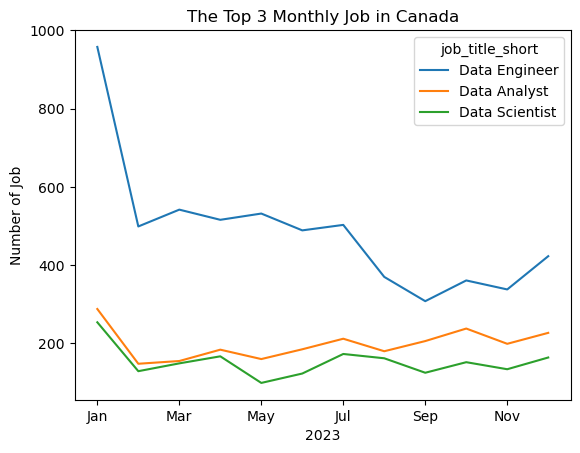

In [58]:
cnd_job_pivot[top_job].plot(kind='line')
plt.title('The Top 3 Monthly Job in Canada')
plt.xlabel('2023')
plt.ylabel('Number of Job')
plt.show()